# **COMPARACIÓN ORDENAMIENTO EN PARALELO**

In [30]:
#%pip install numpy matplotlib
#Importamos las librerias necesirias
from functions import gaussianRandom as gss
from sort import MergeSort
from sort import QuickSort

import matplotlib.pyplot as plt

### **DATABASE**

In [31]:
values = 1000000
data = gss(values)

In [32]:
# Visualización de algunos valores
print(data[:10], end=' ')

[0.6746016955966454, 0.24754922769257104, 0.4585674402714233, -0.9764257353129662, -0.6001841187971269, 1.9735364683632093, 0.5491669858656181, 1.4097323085575497, -0.12229320435284619, 0.29861557527590266] 

### **CAMPANA GAUSS**

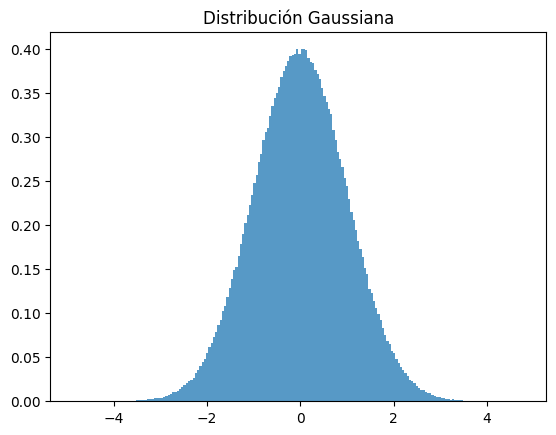

In [33]:
# Visualizar Gráficamente la distribución gaussiana
plt.hist(data, bins=200, density=True, alpha=0.75)
plt.title('Distribución Gaussiana')
plt.show()

In [34]:
logs = []

### **MERGESORT BENCHMARK**

In [35]:
sort = MergeSort()
th_merge_sort = sort.run(data)
logs.append(sort.log())

print(th_merge_sort[:5], end=' ')

[-4.876583751779956, -4.7045774578882975, -4.565780247654257, -4.465076002844775, -4.367242072295051] 

In [36]:
sort = MergeSort(threads=2)
th2_merge_sort = sort.run(data)
logs.append(sort.log())

print(th2_merge_sort[:5], end=' ')

[-4.876583751779956, -4.7045774578882975, -4.565780247654257, -4.465076002844775, -4.367242072295051] 

In [37]:
sort = MergeSort(threads=4)
th4_merge_sort = sort.run(data)
logs.append(sort.log())

print(th4_merge_sort[:5], end=' ')

[-4.876583751779956, -4.7045774578882975, -4.565780247654257, -4.465076002844775, -4.367242072295051] 

In [38]:
sort = MergeSort(threads=6)
th6_merge_sort = sort.run(data)
logs.append(sort.log())

print(th6_merge_sort[:5], end=' ')

[-4.876583751779956, -4.7045774578882975, -4.565780247654257, -4.465076002844775, -4.367242072295051] 

### **QUICKSORT BENCHMARK**

In [39]:
sort = QuickSort()
th_quick_sort = sort.run(data)
logs.append(sort.log())

print(th_quick_sort[:5], end=' ')

[-4.876583751779956, -4.7045774578882975, -4.565780247654257, -4.465076002844775, -4.367242072295051] 

In [40]:
sort = QuickSort(threads = 2)
th2_quick_sort = sort.run(data)
logs.append(sort.log())

print(th2_quick_sort[:5], end=' ')

[-4.876583751779956, -4.7045774578882975, -4.565780247654257, -4.465076002844775, -4.367242072295051] 

In [41]:
sort = QuickSort(threads = 4)
th4_quick_sort = sort.run(data)
logs.append(sort.log())

print(th4_quick_sort[:5], end=' ')

[-4.876583751779956, -4.7045774578882975, -4.565780247654257, -4.465076002844775, -4.367242072295051] 

In [42]:
sort = QuickSort(threads = 6)
th6_quick_sort = sort.run(data)
logs.append(sort.log())

print(th6_quick_sort[:5], end=' ')

[-4.876583751779956, -4.7045774578882975, -4.565780247654257, -4.465076002844775, -4.367242072295051] 

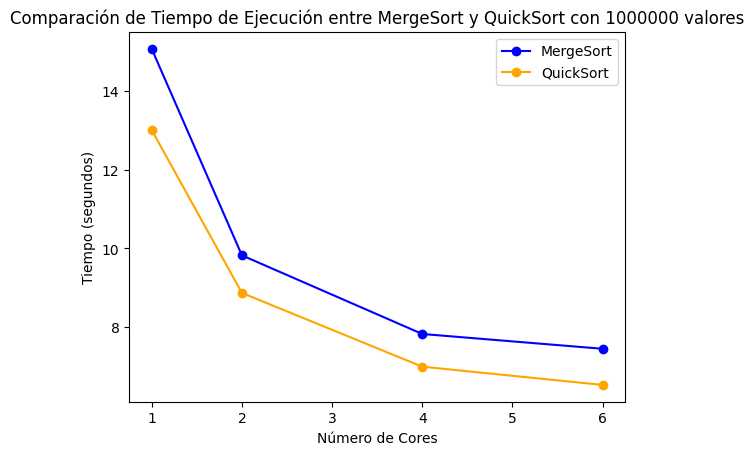

In [43]:
merge_sort_data = [entry for entry in logs if entry['name'] == 'MergeSort']
quick_sort_data = [entry for entry in logs if entry['name'] == 'QuickSort']

# Ordenar los datos según el número de cores
merge_sort_data.sort(key=lambda x: x['cores'])
quick_sort_data.sort(key=lambda x: x['cores'])

# Extraer las coordenadas x e y para cada algoritmo
merge_x = [entry['cores'] for entry in merge_sort_data]
merge_y = [entry['time'] for entry in merge_sort_data]

quick_x = [entry['cores'] for entry in quick_sort_data]
quick_y = [entry['time'] for entry in quick_sort_data]

# Graficar los datos
plt.plot(merge_x, merge_y, marker='o', label='MergeSort', linestyle='-', color='blue')
plt.plot(quick_x, quick_y, marker='o', label='QuickSort', linestyle='-', color='orange')

# Agregar etiquetas y título
plt.xlabel('Número de Cores')
plt.ylabel('Tiempo (segundos)')
plt.title(f'Comparación de Tiempo de Ejecución entre MergeSort y QuickSort con {values} valores')

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()